In [1]:
import cv2 #opencv
import matplotlib.pyplot as plt #绘图展示
import numpy as np #数值计算

%matplotlib inline 

color = ("b", "g", "r")
imgStrList = ("sample01.jpg","sample02.jpeg","sample03.jpeg","sample04.jpeg","sample05.jpeg","sample06.jpg","sample07.jpg","sample08.jpg")

In [2]:
def bgr2rbg(img):
    result = img.copy()
    result[:,:,0] = img[:,:,2]
    result[:,:,2] = img[:,:,0]
    return result

In [3]:
def pmf_bgr(img):
    for i, col in enumerate(color):
        hist, bins = np.histogram(img[:,:,i], 256, [0, 256])
        hist = hist/np.sum(hist)
        plt.plot(hist, color = col)
        plt.xlim([0, 256])

In [4]:
def cdf_bgr(img):
    for i, col in enumerate(color):
        hist, bins = np.histogram(img[:,:,i], 256, [0, 256])
        hist = hist/np.sum(hist)
        plt.plot(hist.cumsum(), color = col)
        plt.xlim([0, 256])

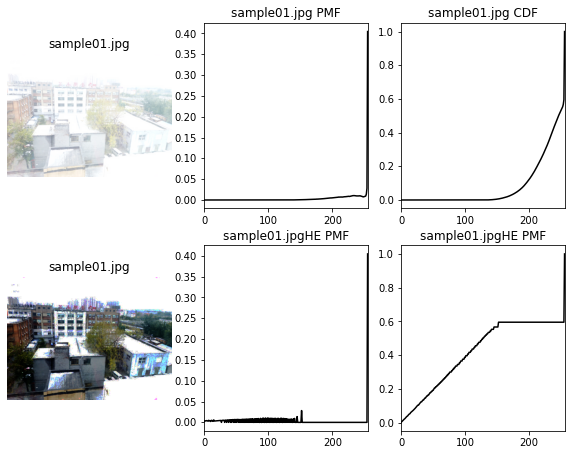

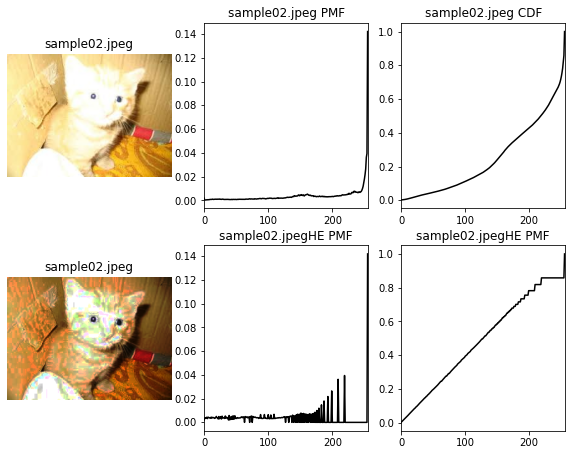

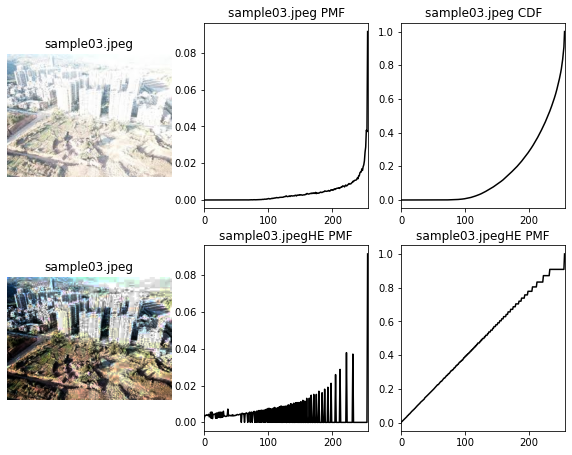

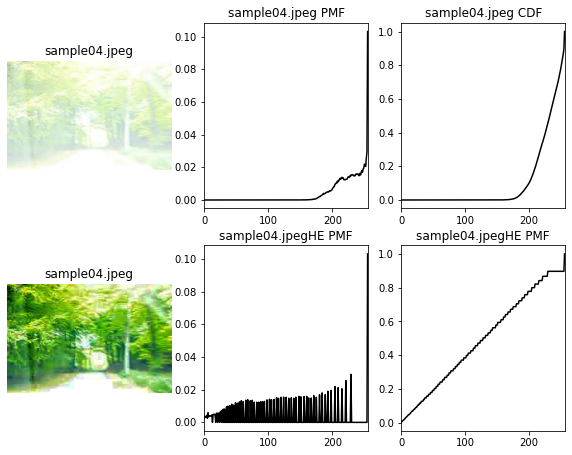

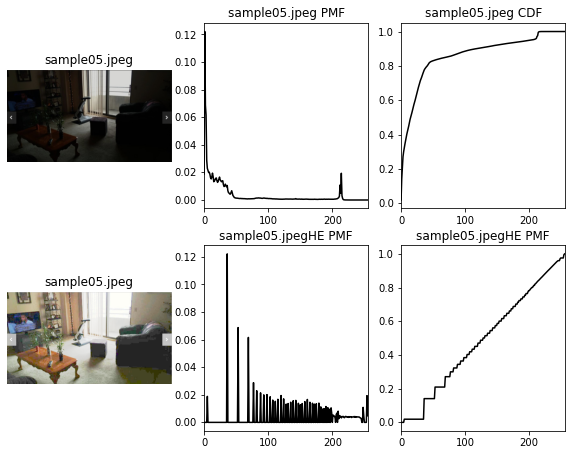

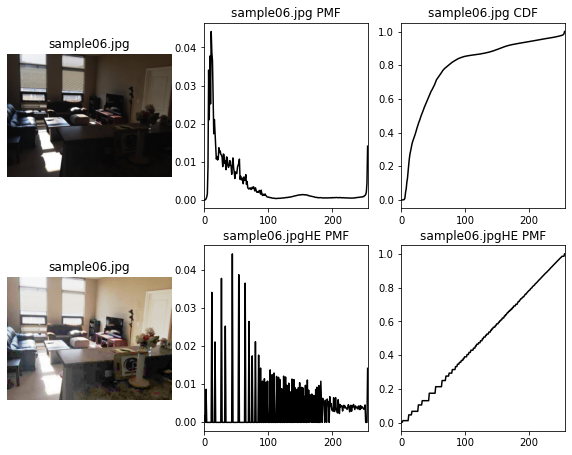

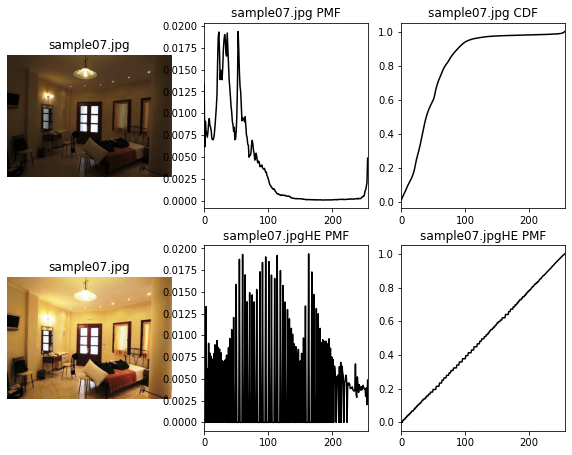

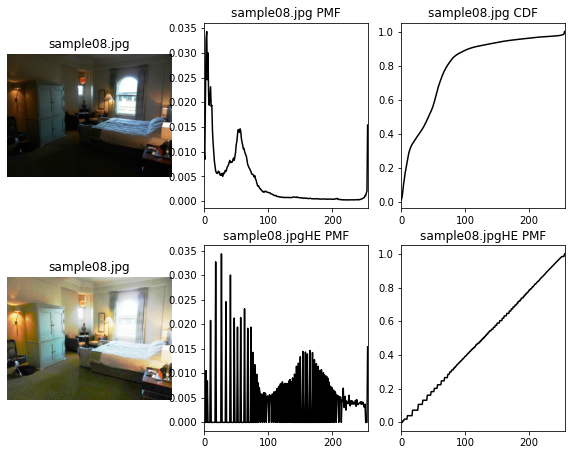

In [5]:
for imgStr in imgStrList:
    img = cv2.imread(imgStr) #彩色
    
    # pmf
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])
    pmf = hist/np.sum(hist)
    # cdf
    cdf = np.cumsum(pmf)
    # f(I) or s_k
    mapping = np.round((256-1)*cdf).astype("uint8")
    # transform
    HE = np.array([mapping[i] for i in img])
    
    # display
    hist, bins = np.histogram(HE.flatten(), 256, [0, 256])
    HEpmf = hist/np.sum(hist)
    HEcdf = np.cumsum(HEpmf)
        
    plt.figure(figsize=(10,7.5))
    plt.subplot(2,3,1)
    plt.title(imgStr)
    plt.imshow(bgr2rbg(img))
    plt.axis("off")
    plt.subplot(2,3,2)
    plt.title(imgStr + " PMF")
    plt.plot(pmf, color = "k")
    plt.xlim([0, 256])
    plt.subplot(2,3,3)
    plt.title(imgStr + " CDF")
    plt.plot(cdf, color = "k")
    plt.xlim([0, 256])
    plt.subplot(2,3,4)
    plt.title(imgStr)
    plt.imshow(bgr2rbg(HE))
    plt.axis("off")
    plt.subplot(2,3,5)
    plt.title(imgStr + "HE PMF")
    plt.plot(HEpmf, color = "k")
    plt.xlim([0, 256])
    plt.subplot(2,3,6)
    plt.title(imgStr + "HE PMF")
    plt.plot(HEcdf, color = "k")
    plt.xlim([0, 256])
    plt.show()